# Dependencies

In [9]:
# Install Dependencies
! pip install numpy matplotlib scikit-learn scipy scikit-image


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\windows\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Data generation and computations

In [ ]:
from main import generate_synthetic_image, tune_k_for_image, run_kmeans_on_image, evaluate_clustering, compute_accuracy

# Parameters
image_size = (200, 200)
n_blobs = 4
blob_std = 15
random_seed = 42
add_noise = True
noise_level = 0.04
k_min, k_max = 2, 8

# Generate data
image, ground_truth, blob_centers = generate_synthetic_image(
    size=image_size,
    n_blobs=n_blobs,
    blob_std=blob_std,
    random_state=random_seed,
    add_noise=add_noise,
    noise_level=noise_level
)

# Tune k
best_k, tuning_results = tune_k_for_image(image, k_range=(k_min, k_max), random_state=random_seed)

# Run K-Means
labels, kmeans_model = run_kmeans_on_image(image, n_clusters=best_k, random_state=random_seed)

# Evaluate
silhouette, inertia = evaluate_clustering(image, labels, kmeans_model)

try:
    accuracy = compute_accuracy(ground_truth, labels)
except Exception:
    accuracy = None

K=2: Silhouette=0.8550, Inertia=270.75
K=3: Silhouette=0.8089, Inertia=128.15


# Plot synthetic image and ground truth

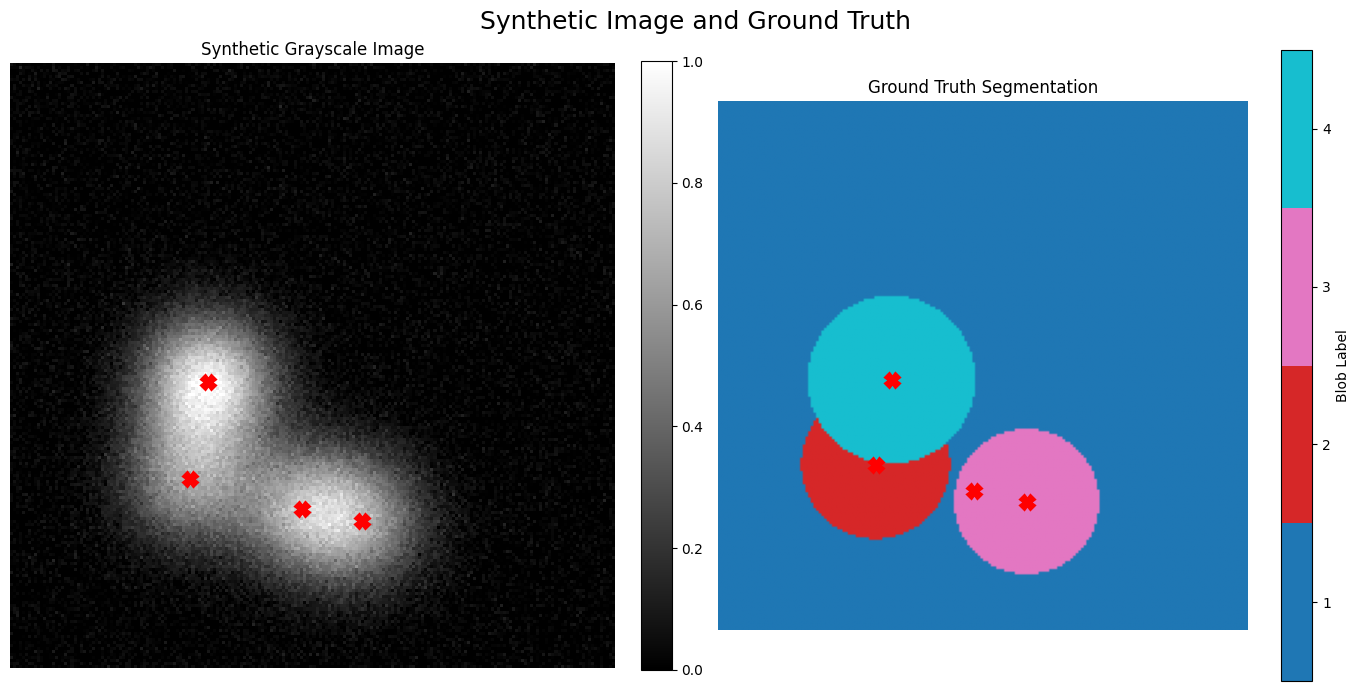

In [ ]:
from main import plot_synthetic_image
plot_synthetic_image(image, ground_truth, blob_centers)

# Plot clustered image

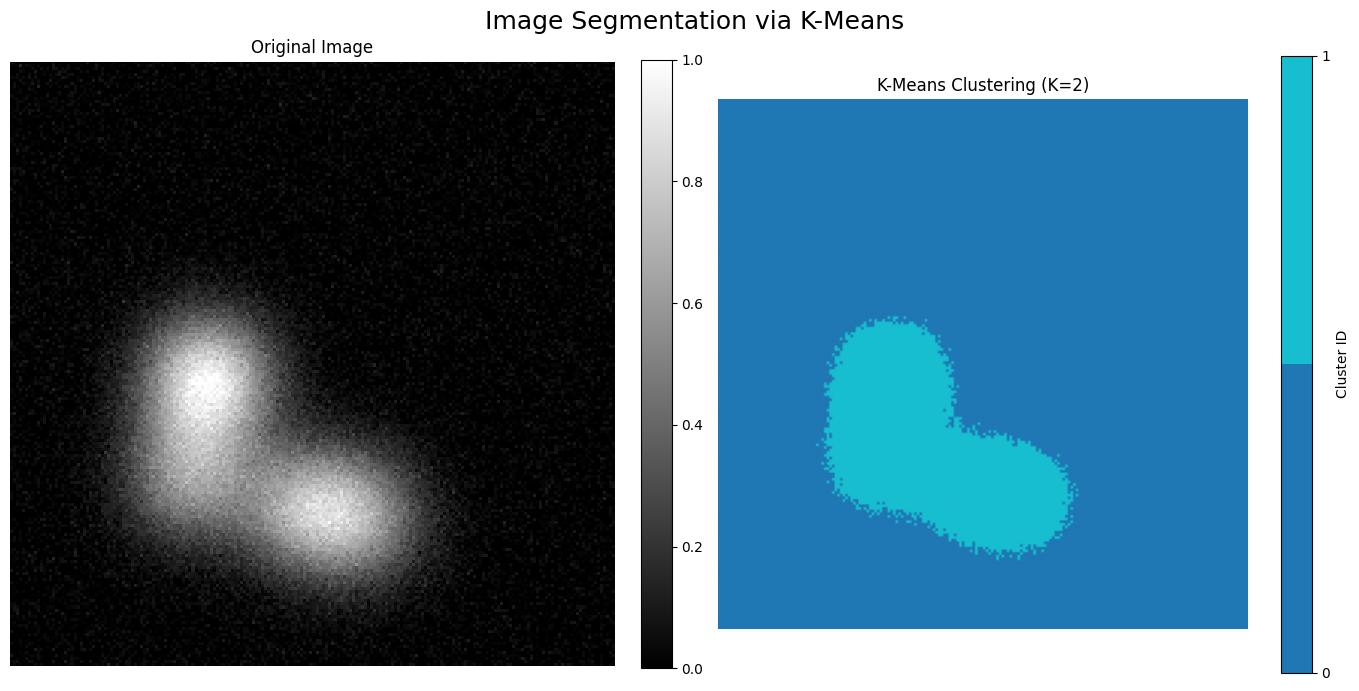

In [ ]:
from main import plot_clustered_image
plot_clustered_image(image, labels, best_k)

# Plot cluster boundaries

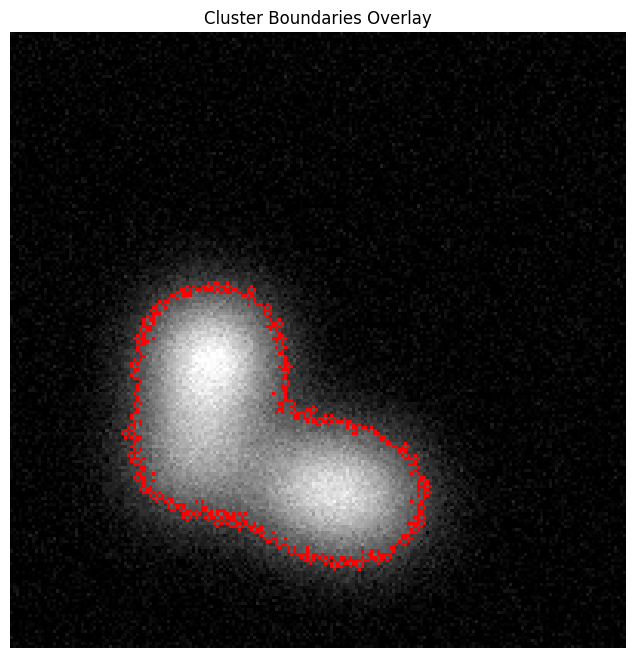

In [ ]:
from main import plot_cluster_boundaries
plot_cluster_boundaries(image, labels)

# Plot cluster centers

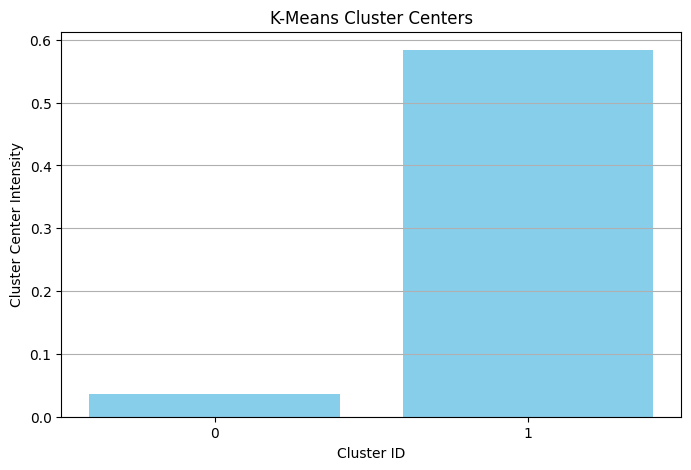

In [ ]:
from main import plot_cluster_centers
plot_cluster_centers(kmeans_model)

# Printed final metrics

In [ ]:
#
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Inertia: {inertia:.2f}")
if accuracy is not None:
    print(f"Approximate segmentation accuracy: {accuracy * 100:.2f}%")
else:
    print("Accuracy computation failed.")

Silhouette Score: 0.8550
Inertia: 270.75
Approximate segmentation accuracy: 86.23%
